In [1]:
import pandas as pd

In [2]:
file_path = "thesis_articles.xlsx"  
thesis = pd.read_excel(file_path, sheet_name=None)

In [34]:
txt = ""
for thesis_name in thesis.keys():
    # 刪除 "翻譯題目" 的 column
    thesis[thesis_name] = thesis[thesis_name].drop(columns=["翻譯題目"], errors="ignore")
    
    # 刪除 "摘要" 列中等於 'Abstract not found' 的 rows
    thesis[thesis_name] = thesis[thesis_name][thesis[thesis_name]["摘要"] != 'Abstract not found']

    for index, row in thesis[thesis_name].iterrows():
        if not row["原文題目"].isascii():
            txt += f"{thesis_name[:-6]}的文章：\n"
            for column_name in thesis[thesis_name].columns:
                txt += column_name + "：" + str(row[column_name]) + " "
            txt += "###\n"

In [35]:
len(txt)

1244964

In [36]:
output_txt_path = "thesis_output.txt"  # Change the path if necessary
with open(output_txt_path, "w", encoding="utf-8") as text_file:
    text_file.write(txt)

In [28]:
lines = txt.split('\n')
max = 0
for line in lines:
    if len(line) > max:
        max = len(line) 
        a = line
max

4683

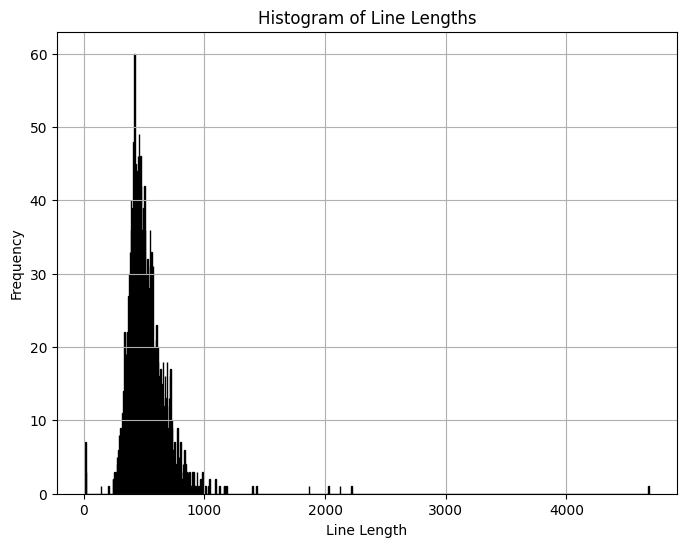

In [29]:
import matplotlib.pyplot as plt

# Calculate the length of each line
line_lengths = [len(line) for line in lines if line.strip() != ""]

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(line_lengths, bins=1000, color='skyblue', edgecolor='black')
plt.title("Histogram of Line Lengths")
plt.xlabel("Line Length")
plt.ylabel("Frequency")
plt.grid(True)

# Display the histogram
plt.show()
